In [156]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
%matplotlib inline

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [102]:
votes = pd.read_csv('../assets/datasets/votes.csv')

In [103]:
votes.head()

,Unnamed: 0,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,1,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,3,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,4,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,5,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


Next, let's define the x and y variables: 

In [104]:
x = (votes.ix[:,2:14].values == 'y').astype(int)
y = votes.ix[:,1].values

In [105]:
x

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 1]])

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [106]:
##First we need to standardize the data so that we can find the covariance matrix.
xStand = StandardScaler().fit_transform(x)

In [107]:
xStand

array([[-0.86835031,  1.10940039, -1.17902922, ...,  1.0069205 ,
        -0.72547625,  1.24252149],
       [-0.86835031,  1.10940039, -1.17902922, ..., -0.99312707,
        -0.72547625,  1.24252149],
       [-0.86835031,  1.10940039,  0.8481554 , ..., -0.99312707,
         1.37840488, -0.80481505],
       ..., 
       [-0.86835031, -0.90138782, -1.17902922, ..., -0.99312707,
         1.37840488,  1.24252149],
       [-0.86835031, -0.90138782, -1.17902922, ..., -0.99312707,
        -0.72547625,  1.24252149],
       [-0.86835031,  1.10940039, -1.17902922, ...,  1.0069205 ,
        -0.72547625,  1.24252149]])

Now, let's check the eigenvalues: 

In [108]:
## .T Transposes the standardized data
covMat1 = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat1)

In [109]:
eigenValues

array([ 5.62972764,  1.39305636,  1.06146894,  0.80225641,  0.70993356,
        0.14530936,  0.54284626,  0.49155717,  0.21552425,  0.38824614,
        0.34390066,  0.30382302])

And the eigenvectors: 

In [110]:
eigenVectors

array([[ 0.22061923,  0.19191042,  0.2311798 , -0.6015333 , -0.64692288,
         0.05913583, -0.01353542, -0.16004841, -0.00585837,  0.21273334,
         0.07328259, -0.02731374],
       [-0.05724413,  0.62900238, -0.01619862, -0.44103428,  0.6015398 ,
        -0.01795272,  0.13185009, -0.1133197 , -0.08989291,  0.0289876 ,
        -0.05163865, -0.04816312],
       [ 0.33800352,  0.11542286, -0.14791992, -0.01534538, -0.00982922,
         0.21322592, -0.4402007 , -0.12772666, -0.05088414, -0.334095  ,
        -0.42978186,  0.54382131],
       [-0.35586317, -0.15138904,  0.06237562, -0.18068828,  0.0459195 ,
         0.43415925,  0.2911962 , -0.17756453,  0.5028514 , -0.18302562,
         0.23248396,  0.40812969],
       [-0.37548378,  0.05339551,  0.01789308, -0.13818482, -0.1446782 ,
        -0.73353445, -0.09844158,  0.00808002, -0.08273321, -0.31979114,
         0.17012079,  0.36046194],
       [-0.29680203,  0.13345763, -0.29959174,  0.12218445, -0.0233219 ,
         0.11677767, -

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [111]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

5.62972764069
1.39305636407
1.06146893606
0.802256406825
0.709933557454
0.542846258132
0.491557170284
0.388246138447
0.34390066459
0.303823016763
0.215524254248
0.145309362018


Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

In [112]:
totalEigen

13.015476190476191

In [113]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

Now, calculate the explained variance and the Cumulative explained variance

In [114]:
cvarex = np.cumsum(varExpl)

In [115]:
cvarex

array([  46.80654782,   58.38866395,   67.21390376,   73.88400492,
         79.78651764,   84.2998371 ,   88.38673005,   91.61467687,
         94.47392761,   96.99996572,   98.79187235,  100.        ])

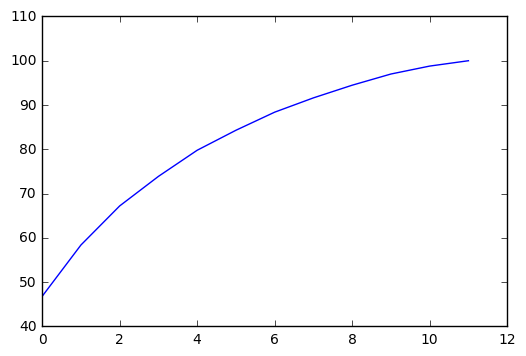

In [116]:
plt.plot(cvarex)
plt.show()

Now, conduct the PCA using scikit learn

In [121]:
PCA_set = PCA(n_components=6)
Y = PCA_set.fit_transform(xStand)

In [122]:
np.cumsum(PCA_set.explained_variance_ratio_)

array([ 0.46806548,  0.58388664,  0.67213904,  0.73884005,  0.79786518,
        0.84299837])

In [123]:
Y

array([[ 3.27869574, -0.09197108,  0.64949822, -0.9083795 , -0.83129868,
         0.30598966],
       [ 3.26265516,  0.43810608, -1.01571509, -0.08871691, -0.92058092,
         0.08399244],
       [ 1.01522534,  2.55070679,  0.08915268,  1.07753853, -0.2646524 ,
        -1.17794362],
       ..., 
       [ 2.97800955,  0.41242496, -0.30015858,  1.73829041,  1.03239364,
         0.67493079],
       [ 3.14754935, -0.82668448, -1.04828708,  0.79810961,  0.28898823,
        -0.18113017],
       [ 3.27869574, -0.09197108,  0.64949822, -0.9083795 , -0.83129868,
         0.30598966]])

In [150]:
df_pca = pd.DataFrame(Y)

In [170]:
y = (votes['Class'].values == 'democrat').astype(int)

In [165]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [166]:
labels = kmeans.labels_


In [167]:
silhouette_score(df_pca, labels)

0.41128591971339507

In [174]:
print classification_report(labels, y)

             precision    recall  f1-score   support

          0       0.93      0.79      0.86       198
          1       0.85      0.95      0.90       237

avg / total       0.89      0.88      0.88       435



In [176]:
confusion_matrix(y, labels)

array([[157,  11],
       [ 41, 226]])

In [181]:
df_pca['label'] = labels

[]

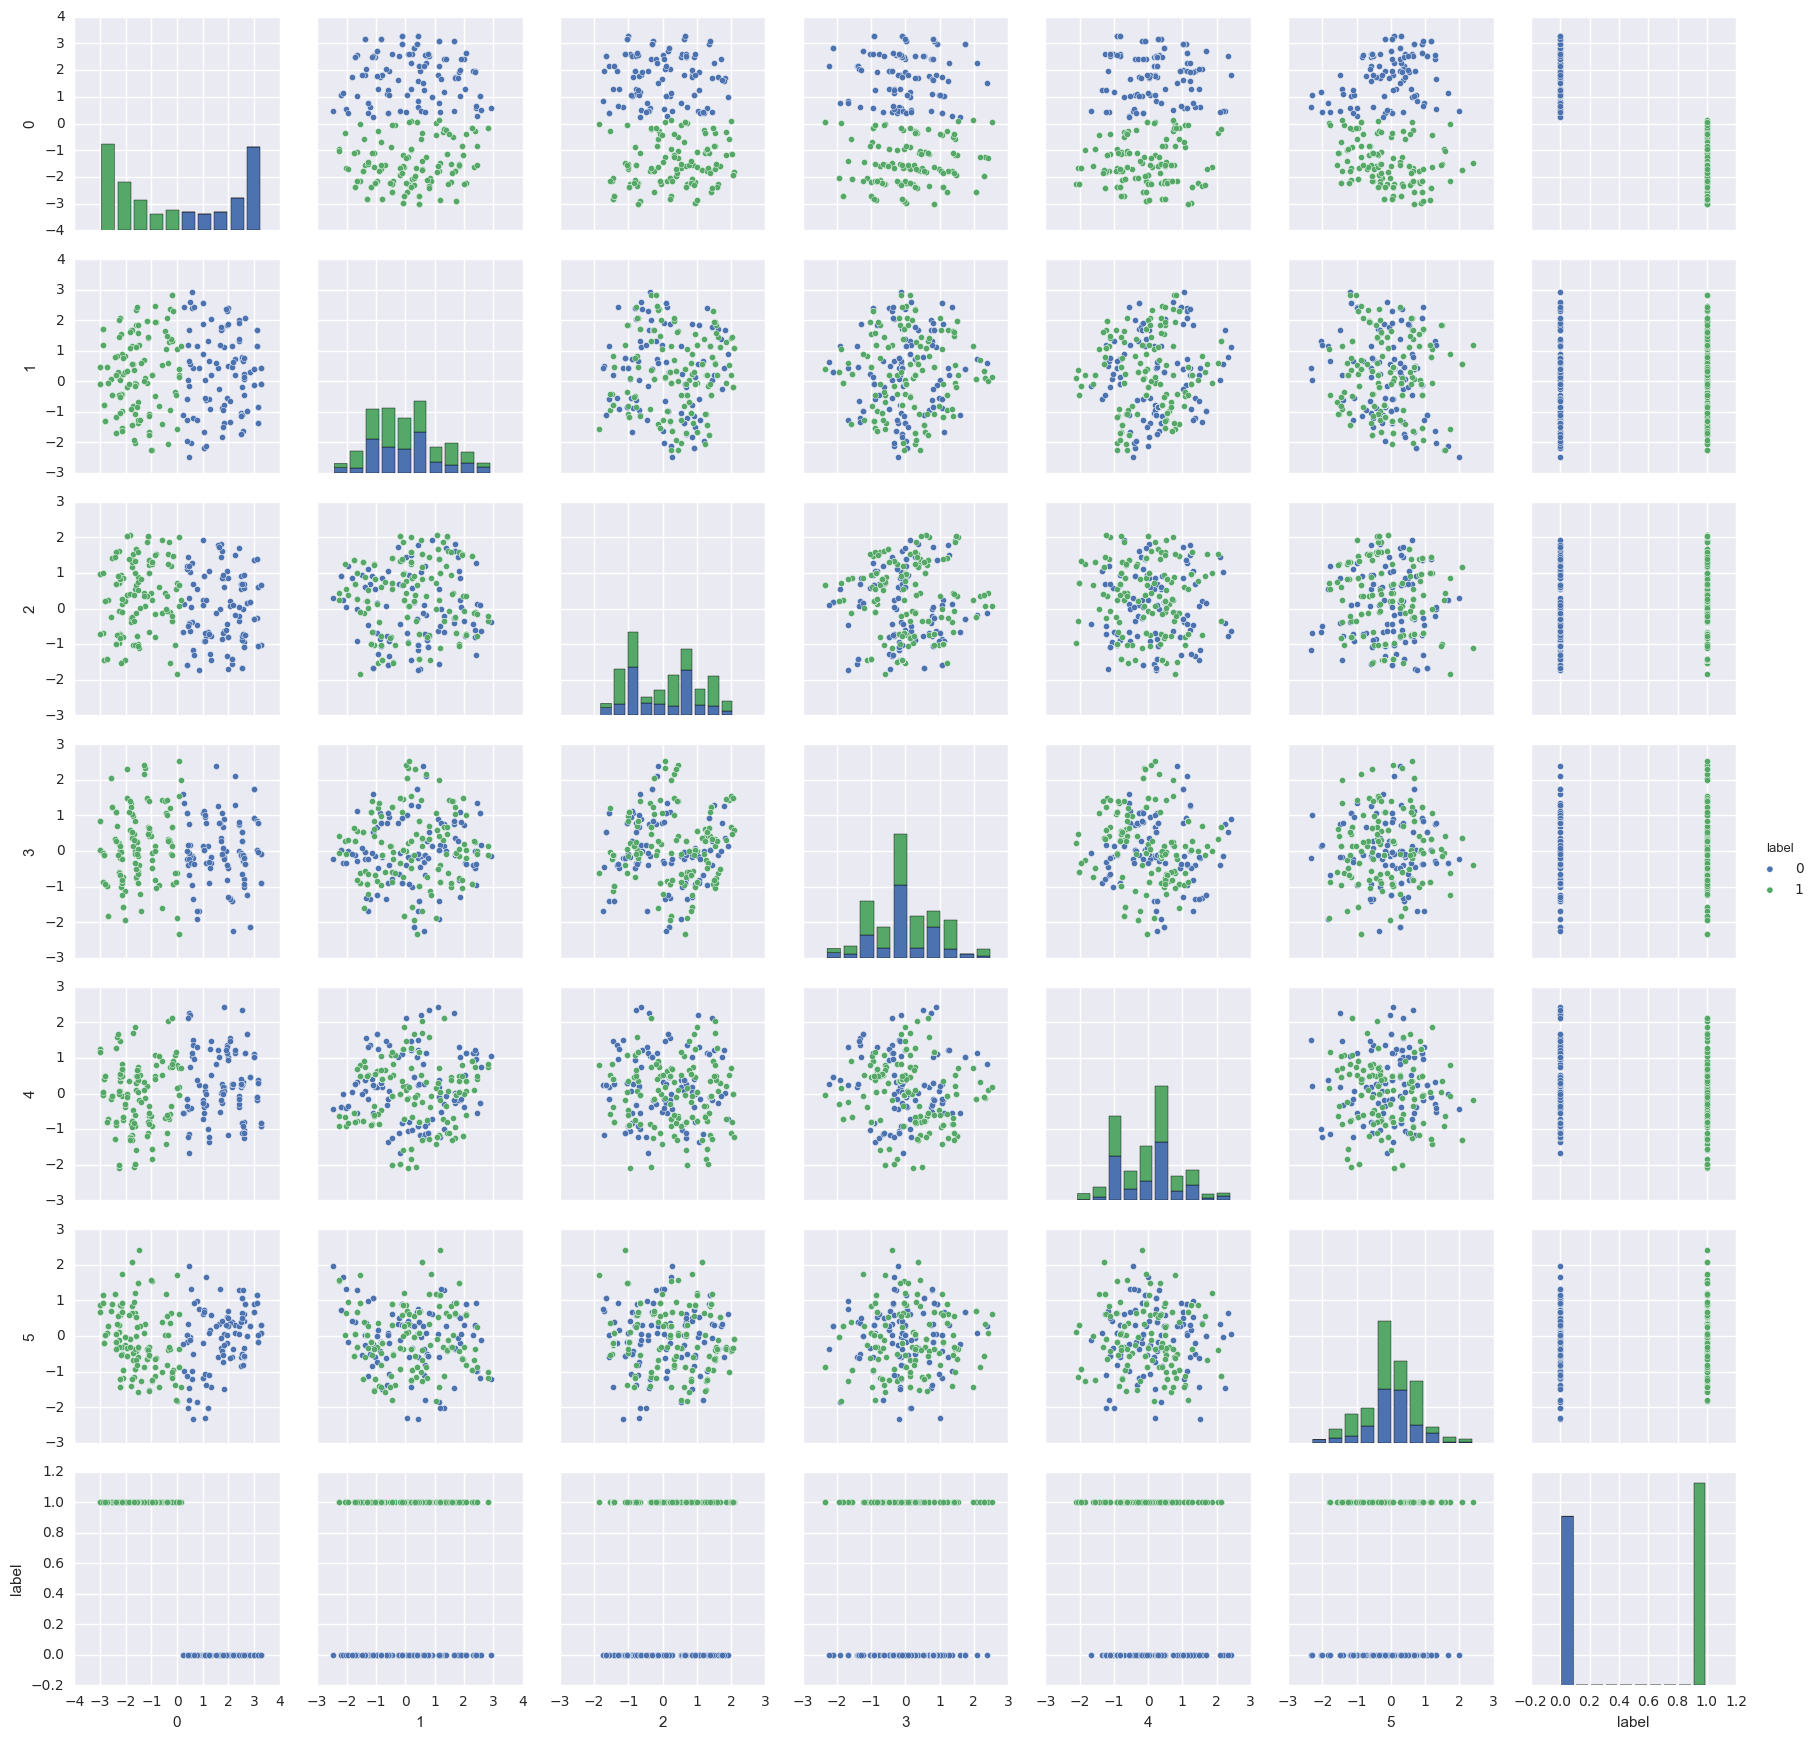

In [182]:
sns.pairplot(df_pca, hue='label')
plt.plot()

# Case #2: Airport Delays

In [54]:
airports = pd.read_csv('../assets/datasets/airport_operations.csv')

In [56]:
airports.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


First, let's define the x and y variables: Airport is going to be our "x" variable

In [81]:
airports.shape
x_ = airports.ix[:,2:15].values
y_ = airports.ix[:,0].values

Then, standardize the x variable for analysis

In [85]:
x_Stand = StandardScaler().fit_transform(x_)

In [86]:
x_Stand

array([[-0.55269892, -0.55179125,  0.41670953, ..., -0.58849731,
        -0.76079377, -0.70168278],
       [-0.57450712, -0.57162597,  0.53460207, ..., -0.52044906,
        -0.9654201 , -0.84232194],
       [-0.59636622, -0.57855433,  0.36633727, ..., -0.57715593,
        -0.65360855, -0.48960786],
       ..., 
       [-1.05379873, -1.05283011, -3.99997364, ..., -1.52983138,
         0.49619655,  3.2161224 ],
       [-1.04012533, -1.03874858, -3.98389739, ..., -1.52983138,
        -0.41000577,  3.07548324],
       [-1.02672683, -1.02436048, -3.88743986, ..., -1.52983138,
         0.5449171 ,  3.33890262]])

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [88]:
covmat2 = np.cov(x_Stand.T)
eigenValues, eigenVectors = np.linalg.eig(covmat2)

Then, check your eigenvalues and eigenvectors:

In [89]:
eigenValues

array([  6.43554591e+00,   4.30034272e+00,   8.46168848e-01,
         5.11389160e-01,   4.68106591e-01,   1.67784858e-01,
         1.20373902e-01,   8.75752619e-02,   6.42089840e-02,
         1.02498362e-02,   2.85997229e-03,   1.66983552e-04,
         7.03167500e-04])

In [90]:
eigenVectors

array([[  1.15534165e-01,  -4.14065994e-01,  -3.99975407e-01,
         -1.44386242e-01,   1.88812357e-01,  -2.89427568e-01,
          5.58777294e-02,  -8.74632562e-02,   3.56070223e-02,
          2.10712103e-02,  -1.29886455e-02,  -7.07882813e-01,
         -3.47029233e-02],
       [  1.15117360e-01,  -4.13745773e-01,  -4.01992814e-01,
         -1.46930754e-01,   1.86961849e-01,  -2.90096332e-01,
          6.01701522e-02,  -1.00170466e-01,   3.50827364e-02,
          3.13868217e-02,   1.01203490e-02,   7.04169491e-01,
          3.79124127e-02],
       [ -3.16692368e-01,  -2.50781656e-01,   2.54173262e-01,
          1.26763507e-01,   7.27315049e-03,  -6.41665658e-02,
          3.29583557e-01,   2.19208711e-02,   3.30107052e-01,
          1.46329054e-01,  -6.79379109e-01,   2.14540200e-02,
         -2.24646995e-01],
       [ -3.76648424e-01,  -7.51268241e-02,   9.06533172e-02,
          1.18107796e-01,   2.02346218e-01,  -4.71651244e-02,
          3.84319806e-01,   2.70677467e-01,   2.477

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [91]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

6.43554590921
4.30034271686
0.84616884844
0.511389159623
0.468106590922
0.167784858101
0.120373901809
0.0875752619392
0.0642089840261
0.0102498362064
0.002859972289
0.000703167500326
0.000166983552113


In [93]:
totalEigen = sum(eigenValues)
print totalEigen



13.0154761905


In [94]:
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]
cumsum = np.cumsum(varExpl)

In [95]:
cumsum

array([  49.44533581,   82.48556156,   88.98681312,   92.91589841,
         96.51243674,   97.80155483,   98.72640691,   99.39926175,
         99.89258972,   99.97134086,   99.99331449,   99.99871704,  100.        ])

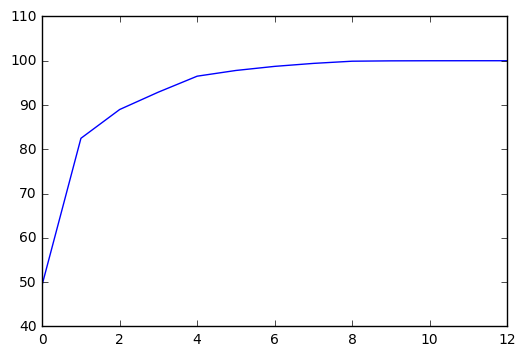

In [96]:
plt.plot(cumsum)
plt.show()

Next, Calculate the explained variance

Finally, conduct the PCA - use the results about to guide your selection of "n" componants

In [99]:
PCA_set = PCA(n_components=5)
Y = PCA_set.fit_transform(x_Stand)
Y

array([[-2.10489099,  0.76968963,  0.06999153,  0.27567295, -0.0758566 ],
       [-2.50178588,  0.700678  , -0.01267505,  0.25064801,  0.02071393],
       [-1.9471831 ,  0.99067389, -0.07942261, -0.03401385, -0.04483278],
       ..., 
       [ 6.34307461,  5.70737003, -1.1857226 ,  0.37113035,  0.27831602],
       [ 5.75664173,  5.77699509, -1.92980617,  0.13982803,  1.42938942],
       [ 6.30906552,  5.6131838 , -1.33990662, -0.01888368,  0.61772091]])